### Dimensionality Reduction
- the motivation is: Is it possible to reduce the number of features without lose much information?
- But why do we want to reduce the feature space? Some reasons are:
    - prevent overfitting
    - make training faster
    - allow the model to find a optimum solution
- These points are referred to a term called **curse of dimensionality**
- Common techniques: projection and manifold. This notebook will focus on projection!

#### PCA (*Principal Component Analysis*)
- main idea: project the data onto the closest hyperplane to it

#### 1. Preserving the Variance
- before projecting, we need to find the best hyperplane that is able to preserve the maximum of variance since we will not lose much information

#### 2. Principal Components
- they correspond to the new axes the data lie
- they can range from 1 to n, where n is the total number of features
- they have an intrisic order, that is, the 1st component is the one that captures the maximum of variance, the 2nd one is the component that capture less variance than the 1st but more than the 3rd, and so on
- they are orthogonal to each other
- for each principal component, we have a zero-centered unit vector that points in the direction of each principal component 

#### 3. Find the components
- common technique is called Singular Value Decomposition (SVD)

In [ ]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X = iris['data']
y = iris['target']

In [ ]:
#compute de decomposition
X_centered = X - X.mean(axis=0)
U,s,Vt = np.linalg.svd(X_centered)

In [ ]:
#obtain the projection of X_centered using the first 2 components
Wd = Vt.T[:,:2]
X_new = X_centered.dot(Wd)

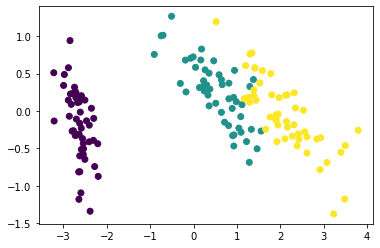

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:,0],X_new[:,1],c=y)

In [ ]:
#using scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_new = pca.fit_transform(X)

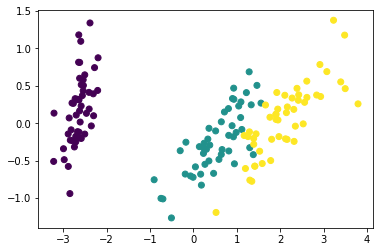

In [ ]:
plt.scatter(X_new[:,0],X_new[:,1],c=y)

#### 4. Explained Variance

In [ ]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% of explained variance')

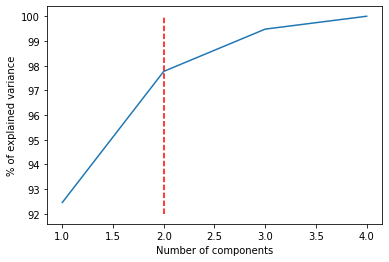

In [ ]:
plt.plot(np.arange(1,5),np.cumsum(pca.explained_variance_ratio_)*100)
plt.vlines(x=2,linestyles='--',ymin=92,ymax=100,color='r')
plt.xlabel('Number of components')
plt.ylabel('% of explained variance')

First component explain 92.4% and the second 5.3% of the total variance (= more than 97% of the total amount of variance). Using more than 2 components will not bring meaningful benefits.


#### Randomized PCA
- finds an approximation of the principal components
- computationally less expensive

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='randomized')
X_new = pca.fit_transform(X)

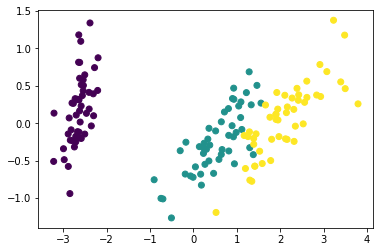

In [ ]:
plt.scatter(X_new[:,0],X_new[:,1],c=y)

In our case, the randomized version produced basically the same result as the original PCA. Sciki-learn performs the randomized solution if the number of features or the number of records are greater than 500  and the number of components corresponds to less than 80% of the total variance. Otherwise, it uses the full SVD.

#### Incremental PCA
- it is useful for large training datasets, where it is not feasible to fit all the training data into memory at once
- it can be found on Scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b7eb737-18d4-4683-a9e5-3ea902dd423b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>